In [26]:
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
data_path = "data/passengers.csv"

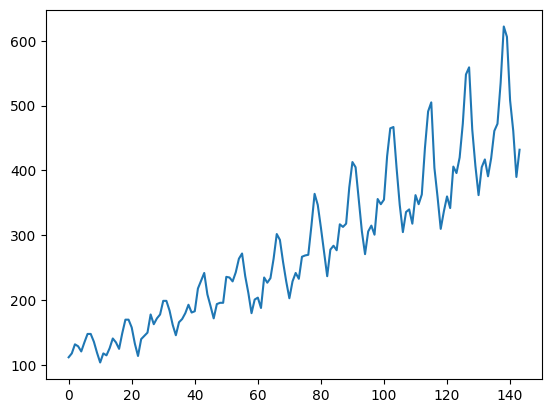

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(data_path)
plt.plot(data.iloc[:,1])

In [86]:
import DataLoader, Machine_Model, Engine, Information
import torch

train_percent = 0.8
val_percent = 0.1
batch_size = 300

dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                     batch_size=batch_size)
train, val, test = dataloader.fit()

if len(train) == 0 or len(val) == 0 or len(test) == 0:
    raise "Data with zero item. Not working. Change the sequence or the batch size."

# INPUT_SIZE = len(train.dataset[0][0][0])  # number of features
INPUT_SIZE = len(Information.features)
HIDDEN_UNITS = 8
OUTPUT_SIZE = 1

model0 = Machine_Model.RNN_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

EPOCHS = 500
loss_fn = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model0.parameters(), learning_rate, weight_decay=0.001)

engine = Engine.Machine_Engine(model=model0, train_dataloader=train, val_dataloader=val, test_dataloader=test)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, epochs_num=EPOCHS, early_stop_patience=None,
                              writer=False, resolution=500)


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 1 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 2 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 3 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 4 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 5 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 6 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 7 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 8 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 9 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 10 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0.181471 Accuracy -6.7822
Epoch 11 | train: Loss 0.183448 Accuracy -2.1332 | validation: Loss 0

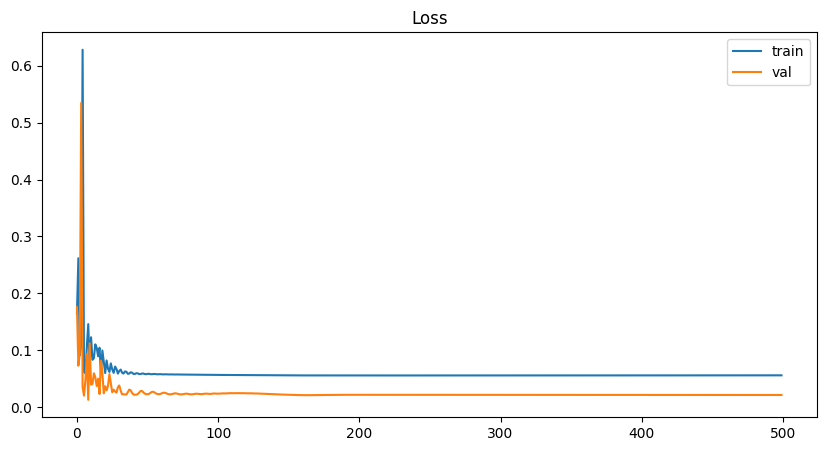

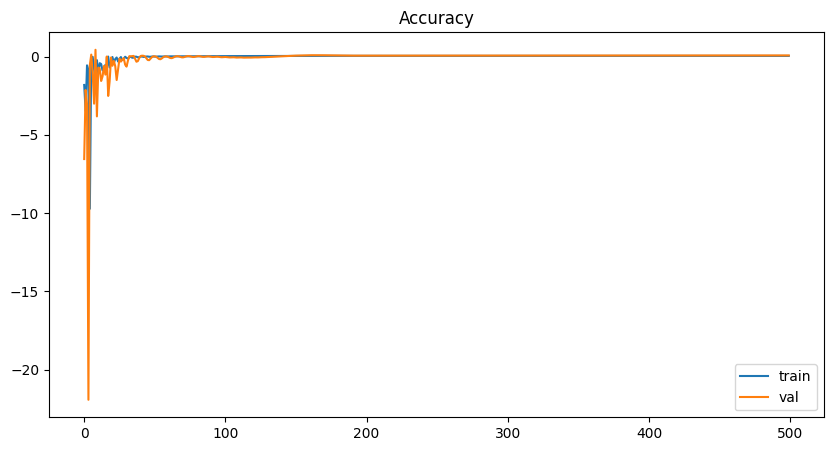

In [73]:
engine.plot_loss()
engine.plot_acc()

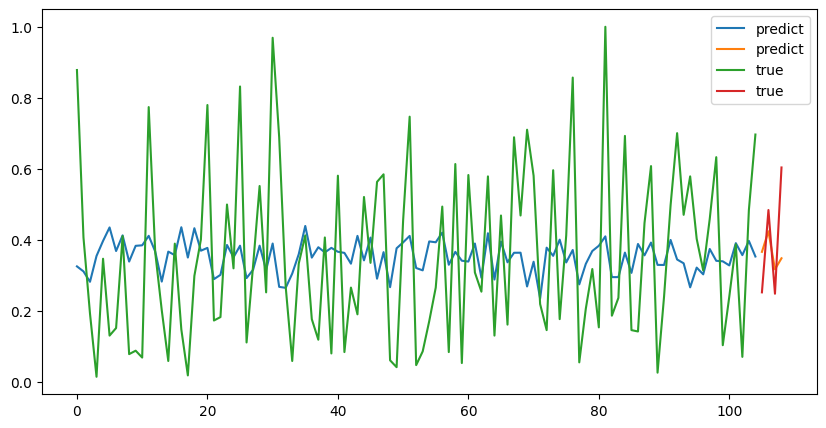

In [74]:
engine.plot_predict_real()

In [23]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.


0.7542276978492737

In [ ]:
engine.save()

In [104]:
%load_ext tensorboard
%tensorboard --logdir=runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
